In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time,sys,os
from sklearn.cluster import KMeans

prod = '6mo'
dys = 180
dates = '2020-12-14' # 直近のDL日

today = datetime.date.today()
last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)

In [2]:
TP = pd.read_csv('./csv/TOPIX_small1/TOPIX_small1.csv')
data =pd.DataFrame(TP)
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

In [3]:
'''終値　毎日変わる
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period=prod).Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes.to_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')'''

"終値\u3000毎日変わる\ncloses   = [] # 終値\n\nfor i in range(len(tickers.tickers)):\n    start = time.time()\n    closes.append(tickers.tickers[i].history(period=prod).Close)\n    t = time.time() - start\n    print(tickers.tickers[i],t)\n\ncloses = pd.DataFrame(closes).T   # DataFrame化\ncloses.columns = stocks           # カラム名の設定\ncloses = closes.ffill()           # 欠損データの補完\ncloses.to_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')"

In [4]:
#closes= pd.read_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')
closes= pd.read_csv('./csv/2020-12-14/closes_2020-12-14_6mo_small498.csv')

closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

earnings = pd.read_csv('./csv/'+str(dates)+'/earnings_'+str(dates)+'_'+prod+'_small498N.csv')
earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)

shares= pd.read_csv('./csv/'+str(dates)+'/shares'+str(dates)+'_'+prod+'_small498N.csv')
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']

equity=pd.read_csv('./csv/'+str(dates)+'/equity'+str(dates)+'_'+prod+'_small498N.csv')
equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

eps=pd.read_csv('./csv/'+str(dates)+'/eps'+str(dates)+'_'+prod+'_small498N.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/'+str(dates)+'/roe'+str(dates)+'_'+prod+'_small498N.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)


In [5]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9869.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,3400.488770,1974.363159,4771.494141,1460.278198,1191.0,1840.268433,615.892029,561.0,7170.0,1043.0,...,3584.214111,2339.0,2290.372070,6000.0,1784.0,1520.097168,2120.118896,2128.009766,604.003113,21530.949219
2020-06-16,3390.531250,2009.210693,4840.861328,1561.055176,1255.0,1905.288574,633.544983,590.0,7400.0,1101.0,...,3643.703125,2358.0,2415.104980,6140.0,1826.0,1544.935303,2162.719482,2176.621826,644.666687,22582.210938
2020-06-17,3445.297607,2031.114868,4885.455078,1580.815308,1259.0,1897.407349,638.448608,576.0,7370.0,1095.0,...,3609.001221,2399.0,2379.747559,6080.0,1796.0,1525.064819,2132.998047,2168.685059,660.535400,22455.759766
2020-06-18,3395.510010,2010.206421,4885.455078,1582.791382,1243.0,1881.644897,646.294373,576.0,7460.0,1092.0,...,3599.086426,2359.0,2368.944092,6110.0,1807.0,1513.142456,2134.979492,2147.851562,634.748718,22355.460938
2020-06-19,3430.361328,2006.223755,4925.093262,1561.055176,1275.0,1857.015991,641.390747,582.0,7450.0,1095.0,...,3534.639893,2359.0,2370.908203,6120.0,1795.0,1491.284790,2135.970215,2160.748535,622.847168,22478.789062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-08,3350.000000,2058.000000,5010.000000,1628.000000,1432.0,1772.000000,718.000000,495.0,7760.0,1098.0,...,3435.000000,1963.0,2401.000000,5930.0,1703.0,1369.000000,2190.000000,2532.000000,896.000000,26467.080078
2020-12-09,3375.000000,2073.000000,5060.000000,1651.000000,1430.0,1773.000000,725.000000,501.0,7790.0,1104.0,...,3415.000000,1996.0,2465.000000,5940.0,1707.0,1385.000000,2240.000000,2609.000000,907.000000,26817.939453
2020-12-10,3470.000000,2101.000000,5090.000000,1665.000000,1413.0,1775.000000,718.000000,504.0,7750.0,1101.0,...,3430.000000,1994.0,2451.000000,6000.0,1729.0,1378.000000,2225.000000,2640.000000,903.000000,26756.240234


In [6]:
latest_closes = closes.iloc[-1]
latest_eps = eps.iloc[-1]
PE = latest_closes / latest_eps
PE= pd.DataFrame(PE)
PE['stocks'] =PE.index
PE.columns = ['PE','stocks'] 

In [7]:
closes["day"] = closes.index                           # 月カラムの作成
closes["end_of_day"] = closes.day.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_day != 0]                         # 月末のみ抽出

In [8]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225,day,end_of_day
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,3400.488770,1974.363159,4771.494141,1460.278198,1191.0,1840.268433,615.892029,561.0,7170.0,1043.0,...,2290.372070,6000.0,1784.0,1520.097168,2120.118896,2128.009766,604.003113,21530.949219,2020-06-15,1 days
2020-06-16,3390.531250,2009.210693,4840.861328,1561.055176,1255.0,1905.288574,633.544983,590.0,7400.0,1101.0,...,2415.104980,6140.0,1826.0,1544.935303,2162.719482,2176.621826,644.666687,22582.210938,2020-06-16,1 days
2020-06-17,3445.297607,2031.114868,4885.455078,1580.815308,1259.0,1897.407349,638.448608,576.0,7370.0,1095.0,...,2379.747559,6080.0,1796.0,1525.064819,2132.998047,2168.685059,660.535400,22455.759766,2020-06-17,1 days
2020-06-18,3395.510010,2010.206421,4885.455078,1582.791382,1243.0,1881.644897,646.294373,576.0,7460.0,1092.0,...,2368.944092,6110.0,1807.0,1513.142456,2134.979492,2147.851562,634.748718,22355.460938,2020-06-18,1 days
2020-06-19,3430.361328,2006.223755,4925.093262,1561.055176,1275.0,1857.015991,641.390747,582.0,7450.0,1095.0,...,2370.908203,6120.0,1795.0,1491.284790,2135.970215,2160.748535,622.847168,22478.789062,2020-06-19,3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-08,3350.000000,2058.000000,5010.000000,1628.000000,1432.0,1772.000000,718.000000,495.0,7760.0,1098.0,...,2401.000000,5930.0,1703.0,1369.000000,2190.000000,2532.000000,896.000000,26467.080078,2020-12-08,1 days
2020-12-09,3375.000000,2073.000000,5060.000000,1651.000000,1430.0,1773.000000,725.000000,501.0,7790.0,1104.0,...,2465.000000,5940.0,1707.0,1385.000000,2240.000000,2609.000000,907.000000,26817.939453,2020-12-09,1 days
2020-12-10,3470.000000,2101.000000,5090.000000,1665.000000,1413.0,1775.000000,718.000000,504.0,7750.0,1101.0,...,2451.000000,6000.0,1729.0,1378.000000,2225.000000,2640.000000,903.000000,26756.240234,2020-12-10,1 days


In [9]:
closes = closes.drop(['day','end_of_day'],axis=1)
dayly_rt = closes.pct_change(freq='D').shift(-1)                        # 月次リターンの作成(ラグあり)
dayly_rt = dayly_rt.sub(dayly_rt["^N225"], axis=0)          # マーケットリターン控除

In [10]:
dayly_rt

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9869.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,-0.051754,-0.031176,-0.034288,0.020187,0.004911,-0.013494,-0.020163,0.002868,-0.016748,0.006783,...,-0.032228,-0.040702,0.005634,-0.025492,-0.025283,-0.032486,-0.028732,-0.025982,0.018498,0.0
2020-06-16,0.021752,0.016501,0.014812,0.018258,0.008787,0.001463,0.013340,-0.018129,0.001546,0.000150,...,-0.003924,0.022987,-0.009041,-0.004172,-0.010830,-0.007262,-0.008143,0.001953,0.030215,0.0
2020-06-17,-0.009984,-0.005828,0.004467,0.005717,-0.008242,-0.003841,0.016755,0.004467,0.016678,0.001727,...,0.001719,-0.012207,-0.000073,0.009401,0.010591,-0.003351,0.005395,-0.005140,-0.034573,0.0
2020-06-18,0.004747,-0.007498,0.002597,-0.019250,0.020227,-0.018606,-0.013104,0.004900,-0.006857,-0.002769,...,-0.023423,-0.005517,-0.004688,-0.003880,-0.012158,-0.019962,-0.005053,0.000488,-0.024267,0.0
2020-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-08,-0.005794,-0.005968,-0.003276,0.000871,-0.014653,-0.012692,-0.003507,-0.001135,-0.009390,-0.007792,...,-0.019079,0.003555,0.013399,-0.011570,-0.010908,-0.001569,0.009575,0.017154,-0.000980,0.0
2020-12-09,0.030449,0.015808,0.008230,0.010780,-0.009587,0.003429,-0.007355,0.008289,-0.002834,-0.000417,...,0.006693,0.001299,-0.003379,0.012402,0.015189,-0.002753,-0.004396,0.014183,-0.002109,0.0
2020-12-10,0.021168,0.009112,0.007806,0.006880,0.014492,0.032609,0.015019,-0.004060,0.005167,0.002060,...,0.015538,0.016414,0.004285,0.002210,0.001563,0.021293,0.026798,0.012589,0.038207,0.0


In [11]:
closes = closes[closes.index > str(last)]     # 6m
dayly_rt = dayly_rt[dayly_rt.index > str(last)]

closes = closes.drop(["^N225"], axis=1)  # 不要なカラムを削除
dayly_rt = dayly_rt.drop(["^N225"], axis=1)

eps_df = pd.DataFrame(index=dayly_rt.index, columns=dayly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=dayly_rt.index, columns=dayly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

stack_dayly_rt = dayly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_dayly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]# カラム名の設定

In [12]:
df["rt"][df.rt > 1.0] = np.nan         
df.to_csv('./csv/'+str(today)+'/df_dayly'+str(today)+'_'+prod+'_small498N.csv')

/home/lcj001/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
#df = pd.read_csv('./csv/'+str(dates)+'/df'+str(dates)+'_'+prod+'_small498N.csv')
df = pd.read_csv('./csv/'+str(today)+'/df_dayly'+str(today)+'_'+prod+'_small498N.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()

In [14]:
#value_df = df[(df.per < 10) & (df.roe > 0.1)]
value_df = df
df1 =pd.pivot_table(value_df, index='stocks',columns='Date',values='rt')
df1=df1.fillna(0)
kmean_model = KMeans(n_clusters=10,random_state=0).fit(df1)
labels = kmean_model.labels_
df1['label'] = labels
kmean_list = df1.iloc[:,-1]

In [15]:
#kmean_list.to_csv('./csv/'+str(dates)+'/kmean_list'+str(dates)+'_'+prod+'_small498N.csv')
kmean_list.to_csv('./csv/'+str(today)+'/kmean_list_dayly'+str(today)+'_'+prod+'_small498N.csv')

In [16]:
df2 = df1.groupby(['label','stocks']).mean()
df2 = df2.stack()
df2 = pd.DataFrame(df2)

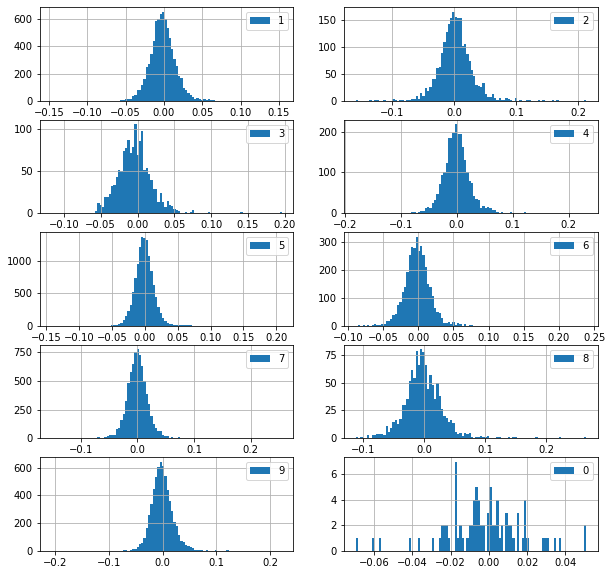

In [17]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)
ax0.hist(df2.query('label == 0'),bins=100)
ax0.legend('0')

ax1.hist(df2.query('label == 1'),bins=100)
ax1.legend('1')

ax2.hist(df2.query('label == 2'),bins=100)
ax2.legend('2')
ax3.hist(df2.query('label == 3'),bins=100)
ax3.legend('3')
ax4.hist(df2.query('label == 4'),bins=100)
ax4.legend('4')
ax5.hist(df2.query('label == 5'),bins=100)
ax5.legend('5')
ax6.hist(df2.query('label == 6'),bins=100)
ax6.legend('6')
ax7.hist(df2.query('label == 7'),bins=100)
ax7.legend('7')
ax8.hist(df2.query('label == 8'),bins=100)
ax8.legend('8')
ax9.hist(df2.query('label == 9'),bins=100)
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

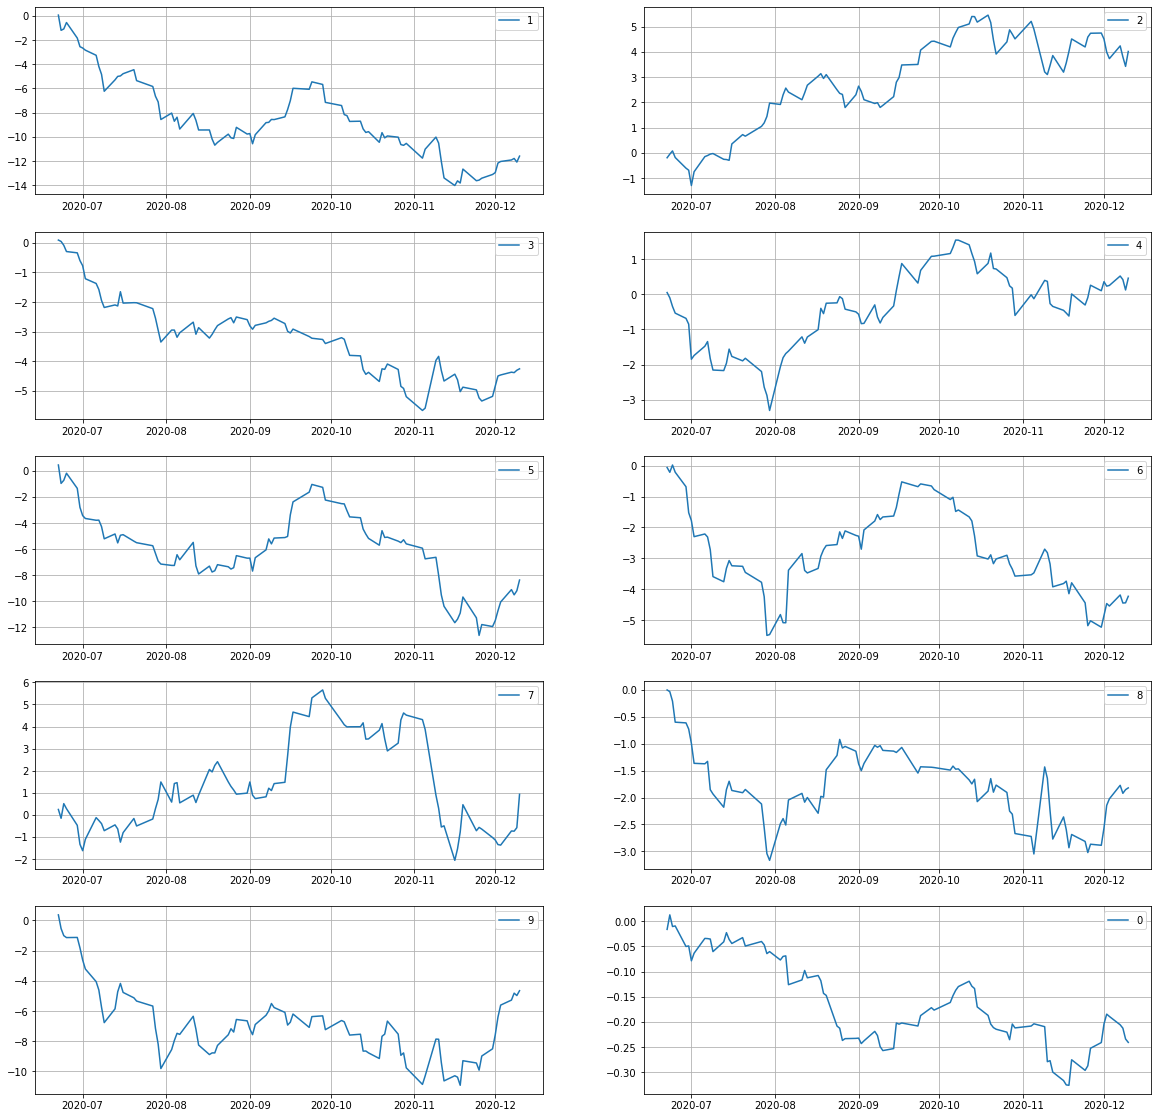

In [18]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)

df0 = df2.query('label == 0')
df00 =df0.groupby('Date').sum()
df00 = df00.cumsum()
ax0.plot(df00)

df1 = df2.query('label == 1')
df11 =df1.groupby('Date').sum()
df11 = df11.cumsum()
ax1.plot(df11)

df22 = df2.query('label == 2')
df222 =df22.groupby('Date').sum()
df222= df222.cumsum()
ax2.plot(df222)

df3 = df2.query('label == 3')
df33 =df3.groupby('Date').sum()
df33 =df33.cumsum()
ax3.plot(df33)

df4 = df2.query('label == 4')
df44 =df4.groupby('Date').sum()
df44 = df44.cumsum()
ax4.plot(df44)

df5 = df2.query('label == 5')
df55 =df5.groupby('Date').sum()
df55 = df55.cumsum()
ax5.plot(df55)

df6 = df2.query('label == 6')
df66 =df6.groupby('Date').sum()
df66= df66.cumsum()
ax6.plot(df66)

df7 = df2.query('label == 7')
df77 =df7.groupby('Date').sum()
df77 = df77.cumsum()
ax7.plot(df77)

df8 = df2.query('label == 8')
df88 =df8.groupby('Date').sum()
df88 = df88.cumsum()
ax8.plot(df88)

df9 = df2.query('label == 9')
df99 =df9.groupby('Date').sum().cumsum()
ax9.plot(df99)

ax0.legend('0')
ax1.legend('1')
ax2.legend('2')
ax3.legend('3')
ax4.legend('4')
ax5.legend('5')
ax6.legend('6')
ax7.legend('7')
ax8.legend('8')
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

In [19]:
TP= pd.read_csv('./csv/TOPIX_small1/TOPIX_small1_info.csv')
TP.rename(columns={'コード':'code'},inplace=True)

In [20]:
TP['stocks'] = [str(s)+".T" for s in TP.code]

In [21]:
tp_kmean = pd.merge(TP,kmean_list,on='stocks')
tp_kmean = pd.merge(PE,tp_kmean,on='stocks') # P/E 40以下 株価収益率の標準値は14から20の間 

In [22]:
tp_kmean.query('label == 0')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
236,10.687037,6235.T,20200930,オプトラン,6235,機械,0.01%,TOPIX Small 1,0


In [23]:
tp_kmean.query('label == 1')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
7,3.636388,1720.T,20200930,東急建設,1720,建設業,0.01%,TOPIX Small 1,1
9,4.145541,1805.T,20200930,飛島建,1805,建設業,0.00%,TOPIX Small 1,1
27,9.199942,2060.T,20200930,フィード・ワン,2060,食料品,0.01%,TOPIX Small 1,1
28,19.526259,2109.T,20200930,三井製糖,2109,食料品,0.01%,TOPIX Small 1,1
35,23.550020,2220.T,20200930,亀田菓,2220,食料品,0.01%,TOPIX Small 1,1
...,...,...,...,...,...,...,...,...,...
445,12.046121,9025.T,20200930,鴻池運輸,9025,陸運業,0.01%,TOPIX Small 1,1
446,8.674817,9037.T,20200930,ハマキョウ,9037,陸運業,0.01%,TOPIX Small 1,1
454,12.666839,9303.T,20200930,住友倉,9303,倉庫・運輸関連業,0.02%,TOPIX Small 1,1
472,14.301798,9682.T,20200930,ＤＴＳ,9682,情報・通信業,0.02%,TOPIX Small 1,1


In [24]:
tp_kmean.query('label == 2')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
24,27.833408,1973.T,20200930,ＮＥＳＩＣ,1973,情報・通信業,0.02%,TOPIX Small 1,2
40,38.074705,2317.T,20200930,システナ,2317,情報・通信業,0.03%,TOPIX Small 1,2
41,75.286277,2326.T,20200930,デジアーツ,2326,情報・通信業,0.02%,TOPIX Small 1,2
47,86.747057,2412.T,20200930,ベネ・ワン,2412,サービス業,0.04%,TOPIX Small 1,2
111,53.692630,3635.T,20200930,コーエーテクモ,3635,情報・通信業,0.04%,TOPIX Small 1,2
118,119.920581,3678.T,20200930,メディアドゥ,3678,情報・通信業,0.01%,TOPIX Small 1,2
120,1367.074299,3694.T,20200930,オプティム,3694,情報・通信業,0.01%,TOPIX Small 1,2
122,44.477874,3762.T,20200930,テクマト,3762,情報・通信業,0.01%,TOPIX Small 1,2
123,48.336011,3774.T,20200930,ＩＩＪ,3774,情報・通信業,0.03%,TOPIX Small 1,2
124,49.082602,3844.T,20200930,コムチュア,3844,情報・通信業,0.01%,TOPIX Small 1,2


In [25]:
tp_kmean.query('label == 3')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
36,41.062692,2222.T,20200930,寿スピリッツ,2222,食料品,0.02%,TOPIX Small 1,3
45,14.439327,2379.T,20200930,ディップ,2379,サービス業,0.01%,TOPIX Small 1,3
58,14.066810,2685.T,20200930,アダストリア,2685,小売業,0.01%,TOPIX Small 1,3
60,7.656442,2726.T,20200930,パルグループＨＤ,2726,小売業,0.00%,TOPIX Small 1,3
108,9.223276,3608.T,20200930,ＴＳＩ ＨＤ,3608,繊維製品,0.00%,TOPIX Small 1,3
187,-2.153340,5202.T,20200930,板硝子,5202,ガラス・土石製品,0.01%,TOPIX Small 1,3
205,50.078672,5726.T,20200930,大阪チタ,5726,非鉄金属,0.00%,TOPIX Small 1,3
215,-11.341819,5949.T,20200930,ユニプレス,5949,輸送用機器,0.01%,TOPIX Small 1,3
312,-0.337574,7003.T,20200930,三井Ｅ＆Ｓ,7003,輸送用機器,0.01%,TOPIX Small 1,3
316,38.844813,7148.T,20200930,ＦＰＧ,7148,証券、商品先物取引業,0.01%,TOPIX Small 1,3


In [26]:
tp_kmean.query('label == 4')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
29,44.798465,2120.T,20200930,ＬＩＦＵＬＬ,2120,サービス業,0.01%,TOPIX Small 1,4
30,17.806573,2124.T,20200930,ＪＡＣ,2124,サービス業,0.00%,TOPIX Small 1,4
31,36.591687,2154.T,20200930,ビーネックスグループ,2154,サービス業,0.01%,TOPIX Small 1,4
34,56.422144,2170.T,20200930,ＬＩＮＫ＆Ｍ,2170,サービス業,0.00%,TOPIX Small 1,4
48,22.097513,2427.T,20200930,アウトソシング,2427,サービス業,0.02%,TOPIX Small 1,4
84,19.170824,3104.T,20200930,富士紡ＨＤ,3104,繊維製品,0.01%,TOPIX Small 1,4
92,23.545481,3186.T,20200930,ネクステージ,3186,小売業,0%,TOPIX Small 1,4
112,38.813967,3655.T,20200930,ブレインパッド,3655,情報・通信業,0.00%,TOPIX Small 1,4
115,-5.467806,3660.T,20200930,アイスタイル,3660,情報・通信業,0.00%,TOPIX Small 1,4
119,47.856737,3687.T,20200930,フィックスターズ,3687,情報・通信業,0.01%,TOPIX Small 1,4


In [27]:
tp_kmean.query('label == 5')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
1,43.657653,1379.T,20200930,ホクト,1379,水産・農林業,0.01%,TOPIX Small 1,5
2,30.724757,1414.T,20200930,ショーボンド,1414,建設業,0.05%,TOPIX Small 1,5
3,11.911133,1417.T,20200930,ミライトＨＤ,1417,建設業,0.03%,TOPIX Small 1,5
4,8.348404,1419.T,20200930,タマホーム,1419,建設業,0.00%,TOPIX Small 1,5
8,12.703149,1766.T,20200930,東建コーポ,1766,建設業,0.01%,TOPIX Small 1,5
...,...,...,...,...,...,...,...,...,...
488,13.943321,9869.T,20200930,加藤産業,9869,卸売業,0.02%,TOPIX Small 1,5
489,34.014492,9928.T,20200930,ミロク情報,9928,情報・通信業,0.01%,TOPIX Small 1,5
490,12.200179,9934.T,20200930,因幡電産,9934,卸売業,0.03%,TOPIX Small 1,5
492,-22.665404,9945.T,20200930,プレナス,9945,小売業,0.01%,TOPIX Small 1,5


In [28]:
tp_kmean.query('label == 6')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
10,5.798464,1815.T,20200930,鉄建建設,1815,建設業,0.01%,TOPIX Small 1,6
18,13.179304,1926.T,20200930,ライト工,1926,建設業,0.01%,TOPIX Small 1,6
59,-501.107958,2695.T,20200930,くら寿司,2695,小売業,0.01%,TOPIX Small 1,6
69,-50.289415,2931.T,20200930,ユーグレナ,2931,食料品,0.02%,TOPIX Small 1,6
71,5640.622882,3028.T,20200930,アルペン,3028,小売業,0.01%,TOPIX Small 1,6
79,26.583016,3085.T,20200930,ＡＬサービスＨＤ,3085,小売業,0%,TOPIX Small 1,6
80,9.792491,3087.T,20200930,ドトル日レス,3087,小売業,0.01%,TOPIX Small 1,6
81,23.886679,3091.T,20200930,ブロンコＢ,3091,小売業,0.01%,TOPIX Small 1,6
82,173.617018,3097.T,20200930,物語コーポ,3097,小売業,0.01%,TOPIX Small 1,6
88,14.984523,3139.T,20200930,ラクト・ジャパン,3139,卸売業,0.01%,TOPIX Small 1,6


In [29]:
tp_kmean.query('label == 7')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
0,25.906828,1377.T,20200930,サカタのタネ,1377,水産・農林業,0.03%,TOPIX Small 1,7
33,139.209035,2168.T,20200930,パソナグループ,2168,サービス業,0.01%,TOPIX Small 1,7
37,18.281792,2281.T,20200930,プリマハム,2281,食料品,0.02%,TOPIX Small 1,7
46,16.987294,2384.T,20200930,ＳＢＳＨＤ,2384,陸運業,0.01%,TOPIX Small 1,7
50,55.346330,2471.T,20200930,エスプール,2471,サービス業,0.01%,TOPIX Small 1,7
...,...,...,...,...,...,...,...,...,...
475,18.144900,9715.T,20200930,トランスコスモス,9715,サービス業,0.01%,TOPIX Small 1,7
480,19.788130,9749.T,20200930,富士ソフト,9749,情報・通信業,0.02%,TOPIX Small 1,7
482,25.526976,9759.T,20200930,ＮＳＤ,9759,情報・通信業,0.03%,TOPIX Small 1,7
494,18.834588,9948.T,20200930,アークス,9948,小売業,0.02%,TOPIX Small 1,7


In [30]:
tp_kmean.query('label == 8')


,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
32,-162.359497,2157.T,20200930,コシダカＨＤ,2157,サービス業,0.00%,TOPIX Small 1,8
77,-2.490197,3053.T,20200930,ペッパー,3053,小売業,0.00%,TOPIX Small 1,8
99,89.444419,3387.T,20200930,クリレスＨＤ,3387,小売業,0.01%,TOPIX Small 1,8
127,46.134826,3926.T,20200930,オープンドア,3926,情報・通信業,0.00%,TOPIX Small 1,8
165,18.706031,4680.T,20200930,ラウンドワン,4680,サービス業,0.01%,TOPIX Small 1,8
305,-22.251016,6958.T,20200930,ＣＭＫ,6958,電気機器,0.01%,TOPIX Small 1,8
314,96.682950,7085.T,20200930,カーブスＨＤ,7085,サービス業,0.01%,TOPIX Small 1,8
394,38.298772,8179.T,20200930,ロイヤルＨＤ,8179,小売業,0.01%,TOPIX Small 1,8
441,10.964661,8920.T,20200930,東祥,8920,サービス業,0.00%,TOPIX Small 1,8
457,22.567002,9416.T,20200930,ビジョン,9416,情報・通信業,0.00%,TOPIX Small 1,8


In [31]:
tp_kmean.query('label == 9')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
5,3.940890,1662.T,20200930,石油資源,1662,鉱業,0.01%,TOPIX Small 1,9
6,8.501082,1719.T,20200930,安藤ハザマ,1719,建設業,0.03%,TOPIX Small 1,9
43,19.018227,2337.T,20200930,いちご,2337,不動産業,0.02%,TOPIX Small 1,9
96,5.153331,3254.T,20200930,プレサンス,3254,不動産業,0.01%,TOPIX Small 1,9
125,7.946328,3865.T,20200930,北越コーポレーション,3865,パルプ・紙,0.01%,TOPIX Small 1,9
...,...,...,...,...,...,...,...,...,...
461,26.907462,9474.T,20200930,ゼンリン,9474,情報・通信業,0.01%,TOPIX Small 1,9
474,9.489650,9699.T,20200930,西尾レントオール,9699,サービス業,0.01%,TOPIX Small 1,9
476,12.261164,9716.T,20200930,乃村工芸,9716,サービス業,0.01%,TOPIX Small 1,9
479,10.139826,9743.T,20200930,丹青社,9743,サービス業,0.01%,TOPIX Small 1,9
